# In studio exercises Timeseries Data in Pandas

Required files (download these from the Gitlab site into the same directory as the notebook on your computer):

* [IDV60901.94866.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Pandas-DataFrames/IDV60901.94866.csv?ref_type=heads)

We will focus on changes in air temperature over certain period of time:

- load the data, create dataframe with only 'local_date_time_full[80]' and 'air_temp',

- rename column 'local_date_time_full[80]',

- change it into datetime format and make it index,

- drop unnecessary column and sort according to date, if needed,

- do line plot of temeprature (based on whole dataset)

- do line plot of temperature for 24 March 2021 only

- downsample (resample) data from 24 March 2021 to average hourly measurements

- compare (using line plot) raw data from 24 March 2021 and rolling mean with 2H window 




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

weather_raw_data = pd.read_csv("IDV60901.94866.csv")
weather_raw_data.tail()

,local_date_time[80],local_date_time_full[80],apparent_t,cloud[80],cloud_base_m,cloud_type[80],gust_kmh,air_temp,dewpt,press_msl,press_tend[80],rain_trace[80],rel_hum,vis_km[80],weather[80],wind_dir[80],wind_spd_kmh
161,23/06:00pm,20210323180000,17.5,Mostly cloudy,300,-,28,19.8,15.6,1001.3,F,0.0,77,30,Distant precip.,SW,22
162,23/05:30pm,20210323173000,18.6,Mostly clear,390,Stratus,28,20.5,15.7,1001.4,-,0.0,74,10,-,SSW,20
163,23/05:00pm,20210323170000,18.3,Mostly clear,390,Stratus,30,20.1,16.0,1001.7,-,0.0,77,10,-,SSW,20
164,23/04:30pm,20210323163000,17.6,Mostly clear,450,Stratus,28,19.9,15.6,1002.0,-,0.0,76,10,-,SSW,22
165,23/04:00pm,20210323160000,17.8,Mostly clear,480,Stratus,28,20.0,16.0,1002.3,-,0.0,78,10,-,SSW,22


In [2]:
weather_raw_data.rename(columns = {"local_date_time_full[80]" : "Timestamp"}, inplace = True)

weather_data = weather_raw_data[["Timestamp","air_temp"]]

weather_data = weather_data.set_index(pd.to_datetime(weather_data["Timestamp"], 
                                                     format='%Y%m%d%H%M%S'))

In [3]:
weather_data.drop(["Timestamp"],axis = 1, inplace = True)

weather_data.sort_index(inplace = True)

<AxesSubplot:xlabel='Timestamp'>

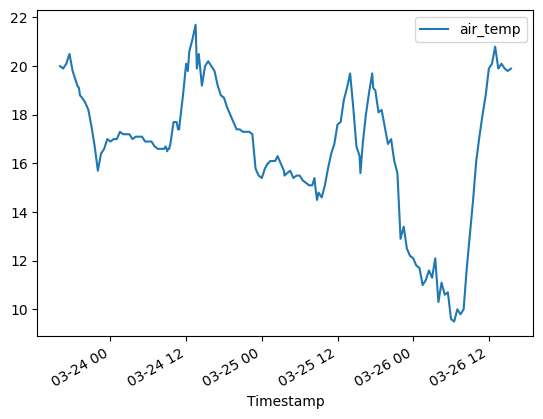

In [4]:
weather_data.plot.line()

<AxesSubplot:xlabel='Timestamp'>

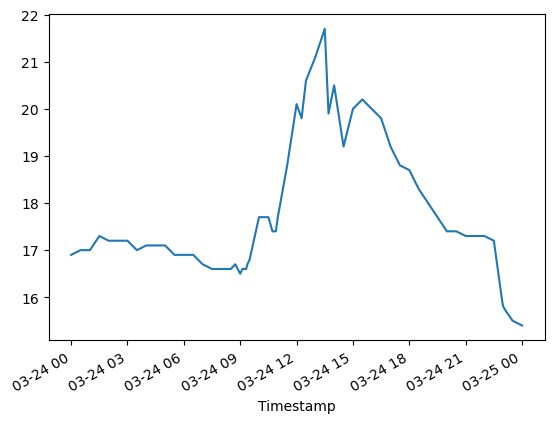

In [5]:
start = pd.Timestamp("2021-03-24 00:00:00")
end = start + pd.Timedelta(hours=24)

weather_24th = weather_data.loc[start:end, "air_temp"]

weather_24th.plot.line()

<AxesSubplot:xlabel='Timestamp'>

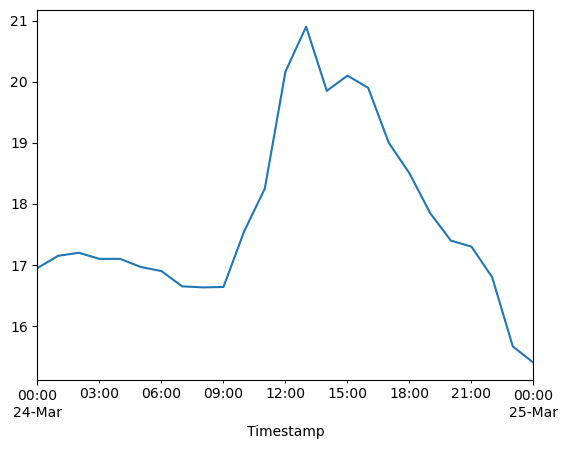

In [6]:
hourly = weather_24th.resample("1H").mean()
hourly.plot.line()

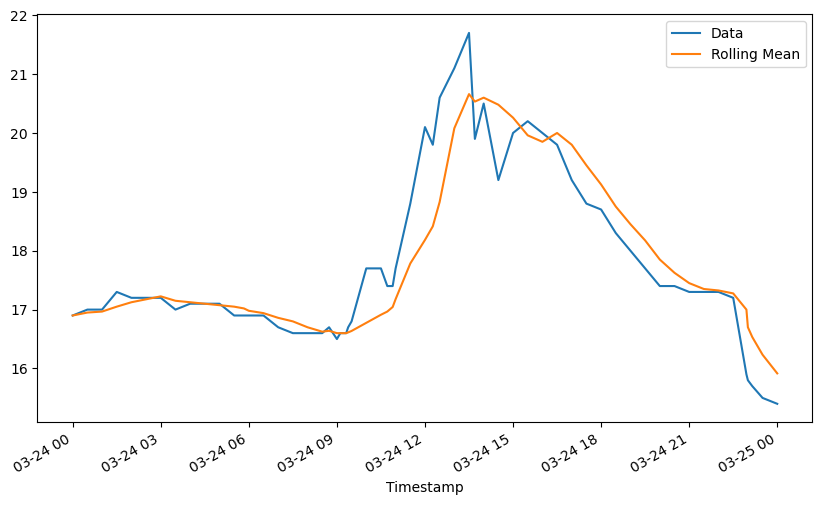

In [7]:
plt.figure(figsize=(10, 6))
# Compute rolling means (2H = 2 hour rolling window).
rolling_mean = weather_24th.rolling('2H').mean()

weather_24th.plot.line(label='Data');
rolling_mean.plot.line(label='Rolling Mean');

# Add a legend to show the labels.
plt.legend();
